# Chicken consumption and Covid-19 incidence by country
The goal of this notebook is to analyse a possible relation between poultry (chicken) production/consumption and the incidence of Covid-19 in world countries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

The dataframe has been generated [here](preprocessing.ipynb) and we load it:

In [2]:
df = pd.read_csv(os.path.join('data', 'poultry.csv'))
df.head()

,Code,Year,production,country,sum_of_cases,sum_of_deaths,confirmed_cases_in_the_last_14_days,population,yearly_change,netchange,density,landarea,migrants,fert_rate,med_age,urban_pop_perc,worldshare,consumption
0,AFG,2018,28850,Afghanistan,37599.0,1375.0,770.0,38928346,2.33,886592,60,652860,-62920,4.6,18,25,0.50,NaN
1,ALB,2018,15587,Albania,7654.0,232.0,1904.0,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63,0.04,NaN
2,DZA,2018,294663,Algeria,39444.0,1391.0,6940.0,43851044,1.85,797990,18,2381740,-10000,3.1,29,73,0.56,6.281003
3,AGO,2018,27208,Angola,1966.0,90.0,802.0,32866272,3.27,1040977,26,1246700,6413,5.6,17,67,0.42,NaN
4,ATG,2018,96,Antigua and Barbuda,93.0,3.0,1.0,97929,0.84,811,223,440,0,2.0,34,26,0.00,NaN


Normalize relevant features by population:

In [3]:
df = df.rename(columns={'sum_of_deaths': 'confirmed_deaths', 'sum_of_cases': 'confirmed_cases'})
df['confirmed_deaths'] = df['confirmed_deaths'] / df['population'] * 1000000
df['confirmed_cases'] = df['confirmed_cases'] / df['population'] * 1000000
df['production'] = df['production'] / df['population'] * 1000

## Chicken prodution X confirmed cases
The number of confirmed cases is an indicator, though not ideal, since it depends also on the intensity of the test policy in each country.

[]

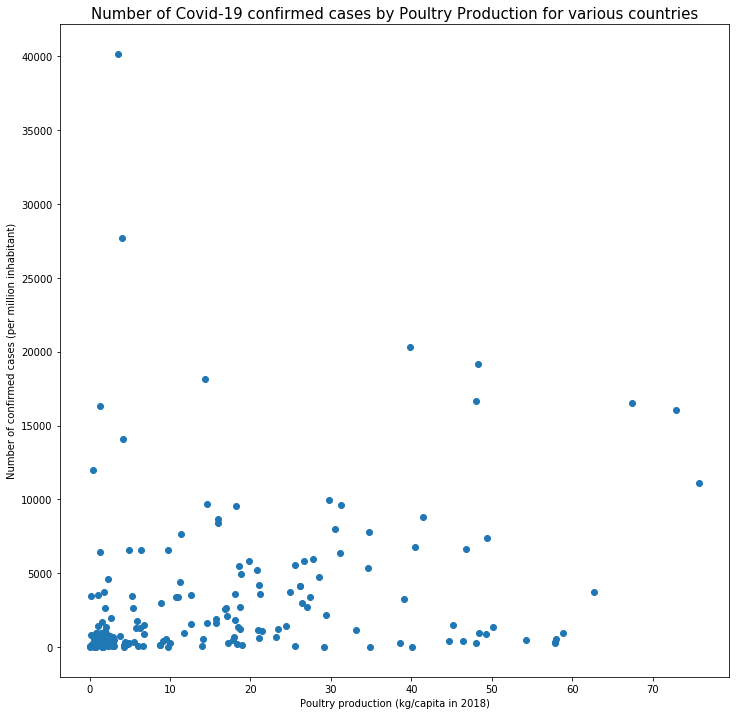

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(df['production'].values, df['confirmed_cases'].values)
ax.set_xlabel('Poultry production (kg/capita in 2018)')
ax.set_ylabel('Number of confirmed cases (per million inhabitant)')
ax.set_title('Number of Covid-19 confirmed cases by Poultry Production for various countries', fontsize=15)

plt.plot()

On the bottom left we see a cluster of countries with low chicken production and low number of confirmed cases. There are however some outliers with 
1. high production but low number of confirmed cases (along the x-axis on the bottom)
2. low production but high number of cases (along the y-axis on the right)


Let's have a look at the 1st kind of outliers:

In [5]:
outliers1 = df[(df['confirmed_cases'] <= 1000) & (df['production'] >= 10000)]['country'].values.tolist()
outliers1

[]

Many of them are countries that took early drastical measures against Covid-19 (China, Taiwan, South Korea) or that implemented very early lockdown (Greece, Slovakia, New Zealand...)

Now let's have a look on the second kind of outliers:

In [6]:
outliers2 = df[(df['confirmed_cases'] >= 2500) & (df['production'] <= 2500)]['country'].values.tolist()
outliers2

['Albania',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'France',
 'Gabon',
 'Germany',
 'Guam',
 'Guatemala',
 'Honduras',
 'Iceland',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Luxembourg',
 'Malta',
 'Mexico',
 'Moldova',
 'Montenegro',
 'Montserrat',
 'Netherlands',
 'Oman',
 'Panama',
 'Peru',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'South Africa',
 'Spain',
 'Suriname',
 'Eswatini',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

Luxembourg is a small countries with many workers from neighbouring countries commuting there for work.

Let's remove those outliers:

In [7]:
outliers = outliers1 + outliers2

In [8]:
df_no_outliers = df.loc[~df['country'].isin(outliers)]

[]

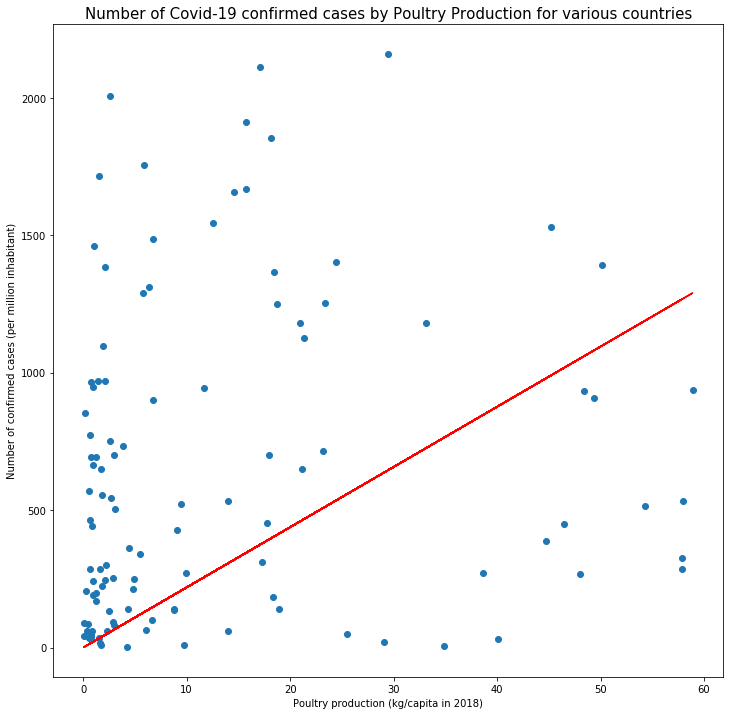

In [9]:
linear_regressor = LinearRegression(fit_intercept=False, normalize=True)
X = df_no_outliers['production'].values.reshape(-1, 1)
y = df_no_outliers['confirmed_cases'].values.reshape(-1, 1)
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)


fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(df_no_outliers['production'].values, df_no_outliers['confirmed_cases'].values)
ax.plot(df_no_outliers['production'].values, y_pred, c='red')
ax.set_xlabel('Poultry production (kg/capita in 2018)')
ax.set_ylabel('Number of confirmed cases (per million inhabitant)')
ax.set_title('Number of Covid-19 confirmed cases by Poultry Production for various countries', fontsize=15)

plt.plot()

Statistical analysis of this linear regression:

In [10]:
mod = sm.OLS(X, y)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.286
Method:                 Least Squares   F-statistic:                              44.98
Date:                Sun, 23 Aug 2020   Prob (F-statistic):                    9.20e-10
Time:                        05:24:42   Log-Likelihood:                         -471.96
No. Observations:                 110   AIC:                                      945.9
Df Residuals:                     109   BIC:                                      948.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0133      0.002      6.707      0.000       0.009       0.017
==============================================================================
Omnibus:                       26.407   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.660
Skew:                           1.288   Prob(JB):                     1.81e-08
Kurtosis:                       4.069   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The [F-statistic](https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test) is good, the [R-squared](https://corporatefinanceinstitute.com/resources/knowledge/other/r-squared/) pretty low.

## Chicken prodution X confirmed deaths
The number of confirmed deaths is also biased, it depends on what is considered as a Covid-19 related death is the various countries (some include all deaths of patients having Covid-19, others only deaths with Covid-19 is established as the cause), but still it's a better indicator than the number of confirmed cases.

[]

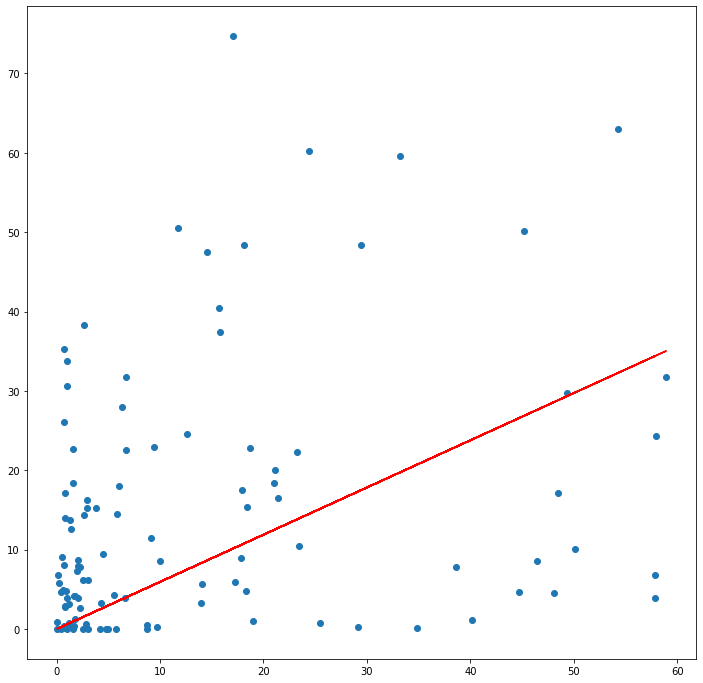

In [11]:
linear_regressor = LinearRegression(fit_intercept=False, normalize=True)
X = df_no_outliers['production'].values.reshape(-1, 1)
y = df_no_outliers['confirmed_deaths'].values.reshape(-1, 1)
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(df_no_outliers['production'].values, df_no_outliers['confirmed_deaths'].values)
ax.plot(df_no_outliers['production'].values, y_pred, c='red')

plt.plot()

Statistical analysis of this linear regression:

In [12]:
mod = sm.OLS(X, y)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.337
Model:                            OLS   Adj. R-squared (uncentered):              0.331
Method:                 Least Squares   F-statistic:                              55.39
Date:                Sun, 23 Aug 2020   Prob (F-statistic):                    2.43e-11
Time:                        05:24:43   Log-Likelihood:                         -468.36
No. Observations:                 110   AIC:                                      938.7
Df Residuals:                     109   BIC:                                      941.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5665      0.076      7.443      0.000       0.416       0.717
==============================================================================
Omnibus:                       26.905   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.948
Skew:                           1.269   Prob(JB):                     9.48e-09
Kurtosis:                       4.274   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This time, with a better indicator, bot the F-statistics and the R-squared are much better, indicating a stronger relationship between poultry production and the target variable.

## Chicken consumption X confirmed deaths
For the chicken consumption, we have data only for 41 countries.

In [13]:
df_consumption = df[df['consumption'].notna()]

[]

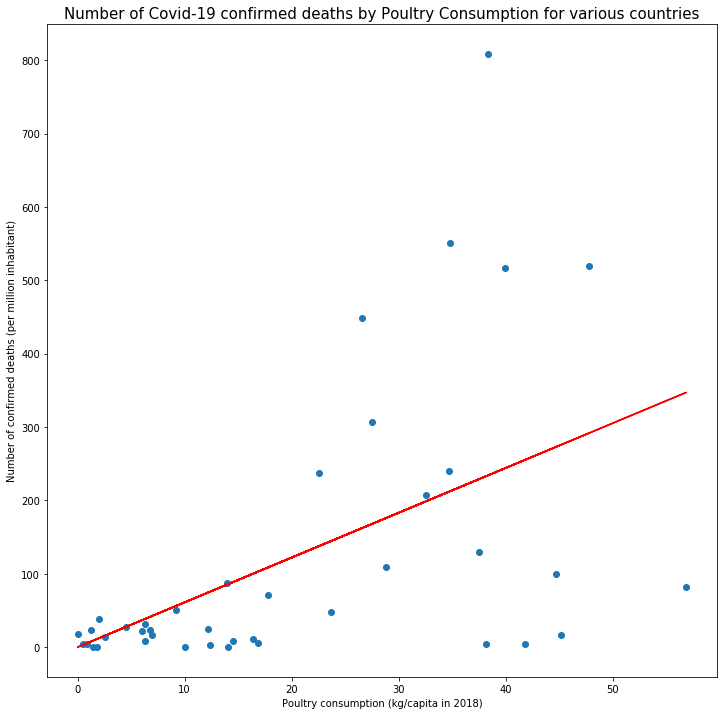

In [14]:
linear_regressor = LinearRegression(fit_intercept=False, normalize=True)
X = df_consumption['consumption'].values.reshape(-1, 1)
y = df_consumption['confirmed_deaths'].values.reshape(-1, 1)
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(df_consumption['consumption'].values, df_consumption['confirmed_deaths'].values)
ax.plot(df_consumption['consumption'].values, y_pred, c='red')
ax.set_xlabel('Poultry consumption (kg/capita in 2018)')
ax.set_ylabel('Number of confirmed deaths (per million inhabitant)')
ax.set_title('Number of Covid-19 confirmed deaths by Poultry Consumption for various countries', fontsize=15)

plt.plot()

Note:
* There is a cluster (on the bottom left) of countries with very low chicken consumption and very low number of confirmed cases.
* below 25kg/year chicken consumption, almost all countries are below th regression line

In [15]:
mod = sm.OLS(X, y)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                              37.79
Date:                Sun, 23 Aug 2020   Prob (F-statistic):                    2.93e-07
Time:                        05:24:43   Log-Likelihood:                         -177.02
No. Observations:                  41   AIC:                                      356.0
Df Residuals:                      40   BIC:                                      357.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0795      0.013      6.147      0.000       0.053       0.106
==============================================================================
Omnibus:                        6.824   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.519
Skew:                           0.764   Prob(JB):                       0.0633
Kurtosis:                       3.945   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion
There are pros and contras in considering chicken production/consumption as having an influence on the incidence of Covid-19.

Pros:
* The statistical relation is stronger with a more accurate target variable (confirmed deaths vs. confirmed cases)
* The chicken production/consumption should be completely irrelevant, but looks statistically quite strong, despite of other factors having an obiously strong impact (sanitary measures like lockdown, health system quality etc.)

Contra:
* Correlation doesn't imply causality

In general, it looks like for low chicken production/consumption, the incidence of Covid-19 in the population is also low. When the chicken production/consumption increases, the incidence is more scattered, but still with an increasing trend. An explanation could be that while poultry has an impact, it can be counter-balanced by other strong factors (sanitary measures).